##CSE-221710313011-D.Manasa

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
#reading the data from the given location:
df=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/cities.csv')
print(df.shape)
df.head(7)

(493, 22)


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,343633,174524,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,880530,503805,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731


##1 : Check the data types and summary statistics of the dataset

In [23]:
#checking the data types of the data:
df.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [24]:
#summary stats of the data:
df.describe(include='all')

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
count,493,493.000000,493,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,493,4.930000e+02,4.930000e+02,4.930000e+02
unique,492,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490,NaN,NaN,NaN
top,Aurangabad,NaN,UTTAR PRADESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"26.449923,80.3318736",NaN,NaN,NaN
freq,2,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
mean,NaN,18.643002,NaN,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,NaN,6.620236e+04,3.771556e+04,2.848680e+04
std,NaN,9.297168,NaN,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,NaN,1.778187e+05,9.849574e+04,7.951556e+04
min,NaN,1.000000,NaN,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,NaN,2.532000e+03,1.703000e+03,8.290000e+02
25%,NaN,9.000000,NaN,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,NaN,1.527700e+04,9.289000e+03,6.114000e+03
50%,NaN,19.000000,NaN,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,NaN,2.395900e+04,1.404900e+04,9.558000e+03
75%,NaN,27.000000,NaN,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,NaN,5.036700e+04,2.787200e+04,2.086600e+04


##2 : Select random columns as Series and random columns as dataframe

In [28]:
#Selecting random columns as series(for series we need only one column)
s=df.sample(axis=1).iloc[:,0]
print(type(s),"\n") #prints series data type
print(s) #prints the series

<class 'pandas.core.series.Series'> 

0       44972
1       43086
2       37660
3       54515
4       45089
        ...  
488     80306
489    217136
490     43339
491     74255
492     46561
Name: literates_female, Length: 493, dtype: int64


In [27]:
#Selecting random columns as DataFrame
d=df.sample(frac=0.4,axis=1) #selecting 40% of total number of columns randomly
print(type(d),'\n') #prints the type of d
d

<class 'pandas.core.frame.DataFrame'> 



,child_sex_ratio,literates_female,literates_male,location,effective_literacy_rate_female,dist_code,0-6_population_male,male_graduates,total_graduates
0,848,44972,58347,"30.1452928,74.1993043",73.59,9,8587,8612,16287
1,909,43086,49347,"21.257584,77.5086754",89.00,7,6186,5269,8863
2,947,37660,46295,"19.0809075,79.560344",72.73,1,6731,6797,10565
3,910,54515,71470,"22.7834741,86.1576889",76.23,24,12063,12189,19225
4,968,45089,56203,"15.6322227,77.2728368",60.33,21,9355,7871,11902
...,...,...,...,...,...,...,...,...,...
488,952,80306,89155,"18.1066576,83.3955506",75.80,12,10495,19173,30656
489,948,217136,258111,"17.9689008,79.5940544",76.79,9,28434,69507,109613
490,898,43339,46752,"20.745319,78.6021946",90.88,8,5139,10645,19363
491,824,74255,92164,"30.1290485,77.2673901",81.71,3,12556,14349,29803


##3 : Convert the data type of integer cols to float and float cols to integer

In [29]:
#convert integer type columns to float and float type column to int
tofloat=df.select_dtypes(include='int64').astype(float)
toint=df.select_dtypes(include='float64').astype(int)
print('Converting int to float:\n')
print(tofloat.head(),'\n\n')
print('converting float to int:\n')
print(toint.head())

Converting int to float:

   state_code  dist_code  ...  male_graduates  female_graduates
0         3.0        9.0  ...          8612.0            7675.0
1        27.0        7.0  ...          5269.0            3594.0
2        28.0        1.0  ...          6797.0            3768.0
3        20.0       24.0  ...         12189.0            7036.0
4        28.0       21.0  ...          7871.0            4031.0

[5 rows x 16 columns] 


converting float to int:

   effective_literacy_rate_total  ...  effective_literacy_rate_female
0                             79  ...                              73
1                             91  ...                              89
2                             80  ...                              72
3                             83  ...                              76
4                             68  ...                              60

[5 rows x 3 columns]


##4 : Visualize the missing values through heatmap

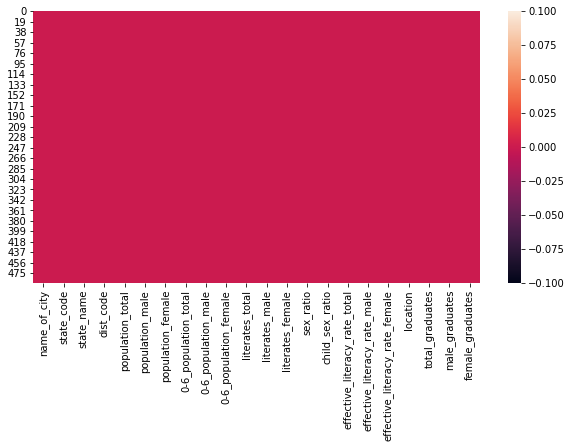

In [10]:
#there are no missing values
plt.subplots(figsize=(10,5))
sns.heatmap(df.isna())

##5 : Dropt the duplicate values if found any

In [12]:
#Drop the duplicate values
df1=df.copy()
for i in df1.columns:
    df1.drop_duplicates(i,inplace=True)
df1

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,880530,503805,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,253588,125256,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932
10,Ajmer,8,RAJASTHAN,21,542580,278786,263794,59437,31547,27890,422913,230586,192327,946,884,87.53,93.26,81.53,"26.4498954,74.6399163",77989,42454,35535
14,Alappuzha,32,KERALA,11,174164,83888,90276,15434,7934,7500,153269,74454,78815,1076,945,96.56,98.03,95.21,"9.4980667,76.3388484",22263,9900,12363
18,Ambala,6,HARYANA,2,196216,103533,92683,19645,10713,8932,155780,85004,70776,895,834,88.23,91.58,84.51,"30.3781788,76.7766974",34943,17809,17134
30,Anantnag,1,JAMMU & KASHMIR,14,108505,56030,52475,18056,9633,8423,71408,39591,31817,937,874,78.95,85.33,72.23,"33.7311255,75.1487007",12666,7291,5375


##6 : Get the row which has highest population

In [13]:
df[df.population_total==max(df.population_total)]

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.7,"19.0760,72.8777",1802371,964964,837407


In [14]:
#alternative
#get the row with highest popluation
pd.DataFrame(df.iloc[df['population_total'].argmax()]).T

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.7,"19.0760,72.8777",1802371,964964,837407


##7 : Calculate the mean of the population total grouped by States and sort the population total in ascending order and plot a horizontal bar chart for that.

In [15]:
df2=pd.DataFrame(df.groupby(df.state_name).population_total.mean()).sort_values(by='population_total')
df2

,population_total
state_name,
ANDAMAN & NICOBAR ISLANDS,100608.000000
NAGALAND,123777.000000
MEGHALAYA,143007.000000
HIMACHAL PRADESH,169758.000000
UTTARAKHAND,223399.500000
BIHAR,258250.615385
MANIPUR,264986.000000
PUDUCHERRY,270900.500000
MIZORAM,291822.000000


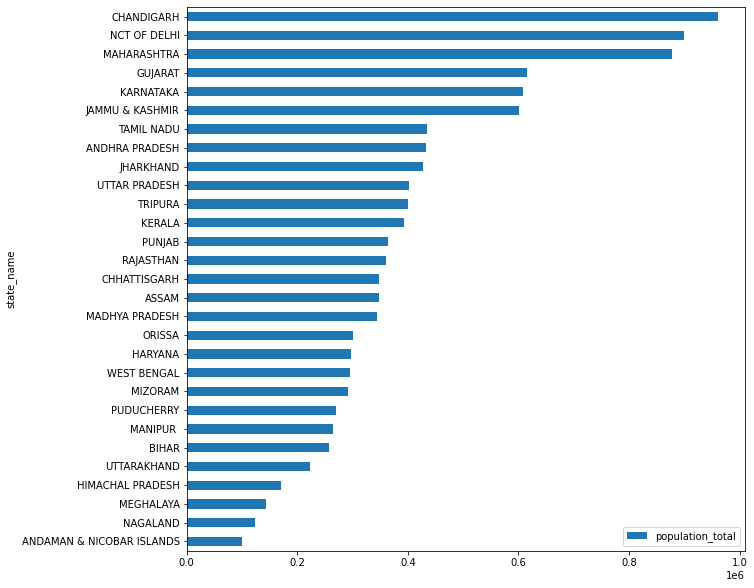

In [16]:
df2.plot.barh(figsize=(10,10))

##8 : Create a dataframe of five cities which have lowest population

In [17]:
low=df.sort_values(by='population_total').head()
low

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
332,Nagda,23,MADHYA PRADESH,18,100036,51410,48626,11053,5840,5213,72618,40765,31853,946,893,81.61,89.46,73.37,"23.4454599,75.4169918",9844,5707,4137
53,Banswara,8,RAJASTHAN,27,100128,51240,48888,12244,6602,5642,76438,41404,35034,954,855,86.98,92.76,81.01,"23.5461394,74.4349761",13852,7837,6015
211,Hinganghat,27,MAHARASHTRA,8,100416,51881,48535,9681,5175,4506,85599,45728,39871,936,871,94.34,97.91,90.56,"20.5505728,78.8411405",11256,6684,4572
136,Datia,23,MADHYA PRADESH,5,100466,52931,47535,12218,6553,5665,71071,40482,30589,898,864,80.54,87.29,73.06,"25.6653262,78.4609393",12717,7960,4757
376,Port Blair,35,ANDAMAN & NICOBAR ISLANDS,3,100608,53247,47361,9358,4852,4506,81908,44908,37000,889,929,89.76,92.79,86.34,"11.6233774,92.7264828",12420,6717,5703


##9 : Create a dataframe of five cities which have highest population

In [18]:
high=df.sort_values(by='population_total',ascending=False).head()
high

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,8583105,4776490,3806615,875,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,6775942,3664959,3110983,914,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,5047705,2688111,2359594,945,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591


##10 : Concatenate the top five and bottom five cities based on the population

In [19]:
pd.concat([low,high])

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
332,Nagda,23,MADHYA PRADESH,18,100036,51410,48626,11053,5840,5213,72618,40765,31853,946,893,81.61,89.46,73.37,"23.4454599,75.4169918",9844,5707,4137
53,Banswara,8,RAJASTHAN,27,100128,51240,48888,12244,6602,5642,76438,41404,35034,954,855,86.98,92.76,81.01,"23.5461394,74.4349761",13852,7837,6015
211,Hinganghat,27,MAHARASHTRA,8,100416,51881,48535,9681,5175,4506,85599,45728,39871,936,871,94.34,97.91,90.56,"20.5505728,78.8411405",11256,6684,4572
136,Datia,23,MADHYA PRADESH,5,100466,52931,47535,12218,6553,5665,71071,40482,30589,898,864,80.54,87.29,73.06,"25.6653262,78.4609393",12717,7960,4757
376,Port Blair,35,ANDAMAN & NICOBAR ISLANDS,3,100608,53247,47361,9358,4852,4506,81908,44908,37000,889,929,89.76,92.79,86.34,"11.6233774,92.7264828",12420,6717,5703
185,Greater Mumbai,27,MAHARASHTRA,99,12478447,6736815,5741632,1139146,599007,540139,10237586,5727774,4509812,852,902,90.28,93.32,86.70,"19.0760,72.8777",1802371,964964,837407
141,Delhi,7,NCT OF DELHI,99,11007835,5871362,5136473,1209275,647938,561337,8583105,4776490,3806615,875,866,87.60,91.44,83.20,"28.7041,77.1025",2221137,1210040,1011097
72,Bengaluru,29,KARNATAKA,18,8425970,4401299,4024671,862493,444639,417854,6775942,3664959,3110983,914,940,89.59,92.63,86.25,"12.9716,77.5946",1591163,908363,682800
184,Greater Hyderabad,28,ANDHRA PRADESH,99,6809970,3500802,3309168,725816,373794,352022,5047705,2688111,2359594,945,942,82.96,85.96,79.79,"17.3850,78.4867",1164149,685402,478747
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,4464303,2459823,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
